# Домашние задание третьего урока.

**1 .Переменная names содержит в себе строку, где хранятся имена в формате 'Name1 Surname1, Name2 Surname2, …'.
Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]**

Переменная names уже задана.

In [ ]:
names_list = []
for i in names.split(', '):
    names_list.append(i)

**2. В переменной df содержатся данные такого вида**

![](https://ucarecdn.com/46eb9638-0fb3-457f-a9b9-80187b100547/)

**Отберите из них только те, где wealth принимает значение 'medium', а возраст составляет больше 35.
Поместите результат в переменную medium_35.**

In [ ]:
medium_35 = df.query("wealth == 'medium' and age > 35")

**3. Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:**

![](https://ucarecdn.com/e6eb7af1-3ef7-400f-9b56-0c9ee3e17d71/)

**Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.**

![](https://ucarecdn.com/46eb9638-0fb3-457f-a9b9-80187b100547/)

Note: колонка называется 'Клиент id' - шрифт плохо передаёт кейс i в id

In [ ]:
df = df.rename(columns={'Клиент id': 'client_id', 
                        'Пол' : 'sex', 
                        'Благосостояние' : 'wealth', 
                        'Возраст': 'age'})

**4. Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет информация превышает ли значение переменной возраста 30 лет или нет (булево значение)**

![](https://ucarecdn.com/46eb9638-0fb3-457f-a9b9-80187b100547/)

In [ ]:
df['older_than_30'] = df.age > 30

**5. А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num.**

![](https://ucarecdn.com/46eb9638-0fb3-457f-a9b9-80187b100547/)

In [ ]:
unique_num = df.nunique()

**6. У нас появились новые данные! Переменная data хранит в себе датафрэйм следующего вида:**

![](https://ucarecdn.com/abdf7c01-a13a-4075-bb5a-595bde5d55ef/)

**Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и поместите результат в переменную full_data (да, придумывать названия переменных иногда бывает сложно)**

**Предыдущий датафрейм загружен в переменную df, новый – в data**

In [ ]:
full_data = data.merge(df, on='client_id')

**7. 💀 Сложное задание! 💀**

**Теперь давайте создадим собственную функцию. Напишите функцию read_n_agg, которая:**

1. принимает на вход один параметр – путь к файлу
2. считывает переданный файл, в котором разделителем является ;
3. считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
4. возвращает результат этих действий (агрегированный датафрэйм)

![](https://ucarecdn.com/8a8350bf-521b-4047-9f46-1b26f546082a/)

P.S. Небольшое уточнение – менять что-то в данных или переименовывать колонки не нужно.

P.P.S. В задании надо указать только функцию, указывать конкретный путь к файлу и/или пытаться его читать не нужно!

In [6]:
import pandas as pd
path = 'C:/Users/Александр/pj/karpov_courses/Python/Homeworks/Datasets/3_companies.csv'
def read_n_agg(path):
    data = pd.read_csv(path, sep=';')
    mean_inc = data.groupby('company').agg({'income' : 'mean'})
    return mean_inc

In [8]:
mean_income = read_n_agg(path)
mean_income.head()

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10


**8. Вернемся к данным по поездкам на такси. На этот раз – из Перу, с рейтингами водителей, пассажиров, координатами, и парой других деталей.**

* journey_id – уникальный id поездки

* user_id – id пользователя

* driver_id – id водителя

* taxi_id – id машины

* icon – тип поездки

* start_type – тип заказа (asap, reserved, delayed)

* start_at – время начала поездки

* start_lat – исходное местоположение пользователя, широта

* start_lon – исходное местоположение пользователя, долгота

* end_at – время окончания поездки

* end_lat – итоговое местоположение, широта

* end_lon – итоговое местоположение, долгота

* end_state – состояние заказа

* driver_start_lat – исходное местоположение водителя, широта

* driver_start_lon – исходное местоположение водителя, долгота

* arrived_at – время прибытия водителя

* source – платформа, с которой сделан заказ

* driver_score – оценка водителя клиентом

* rider_score – оценка клиента водителем
 

**Импортируйте pandas как pd. В данном задании ссылка на датасет находится в переменной path_to_file. 
Загрузите датасет, используя ; в качестве разделителя.**

**Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates).
Результат запишите в переменную taxi.**

 Может пригодиться: [read_csv()](https://lab.karpov.courses/learning/88/module/1103/lesson/9727/28493/133019/)

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
taxi = pd.read_csv('C:/Users/Александр/pj/karpov_courses/Python/Homeworks/Datasets/3_taxi_peru.csv', 
                   parse_dates=['start_at', 'end_at', 'arrived_at'], sep=';')

**9. Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.**

In [23]:
taxi.source.value_counts()

iPhone     9741
web        7631
Android    4909
iPad        571
Wap         136
Name: source, dtype: int64

In [24]:
np.round(taxi.source.value_counts() / len(taxi) * 100)

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

Ответ: iPhone 42.0%

**10. Чтобы показать разницу более наглядно, попробуем визуализировать показатели.**

**Агрегируйте данные и постройте барчарт, где по оси x будет расположено название платформы (source), а по оси y – количество заказов (абсолютные значения).**

Какой график получился?
![](https://storage.yandexcloud.net/klms-public/production/learning-content/65/801/6468/19025/78899/%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_3_10.png)

In [25]:
taxi_counts = (taxi['source'].value_counts() # используем value_counts для подсчета значений, без параметра
               .reset_index() # сбрасываем индекс
               .rename({'index':'source', 'source':'cnt'}, axis='columns')  # меняем значения на читаемые
              )

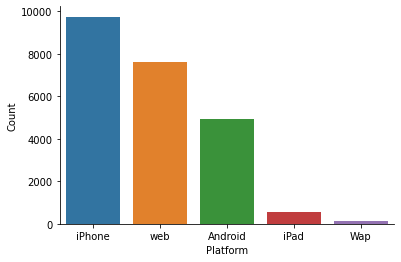

In [26]:
ax = sns.barplot(x='source', y='cnt', data=taxi_counts)
ax.set(xlabel='Platform', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

* A
* B
* **C**

**11. Альтернативный вариант построения распределения категориальной переменной – sns.countplot. В качестве единственного аргумента можно передать всего одну колонку: например, source, а количество значений для оси y функция посчитает самостоятельно.**

sns.countplot(taxi['source'])

**Используйте данный тип графика и проверьте, какой тип поездки (icon) встречался чаще всего.**

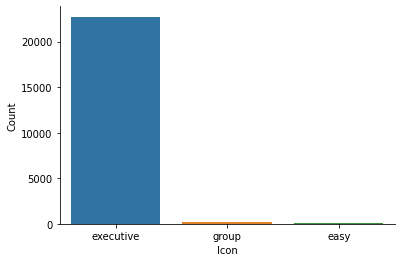

In [27]:
a = sns.countplot(x='icon', data=taxi)
a.set(xlabel='Icon', ylabel='Count')
sns.despine()
plt.show()

* easy
* group
* **executive**

**12. Теперь попробуем построить более сложный график!**

**С помощью sns.countplot и параметра hue визуализируйте распределение переменной end_state (итоговое состояние заказа) в разбивке по платформам (source).**

**Иными словами, по оси x расположите платформу, а в качестве цвета используйте состояние заказа. Далее выберите верные утверждения.**

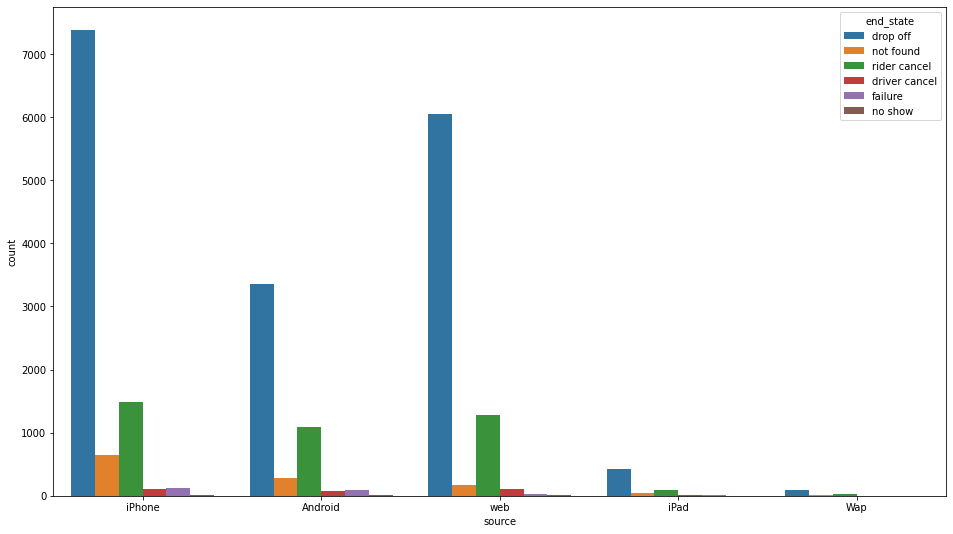

In [28]:
plt.figure(figsize=(16,9))
sns.countplot(data=taxi, hue='end_state', x='source')
plt.show() 

* **Больше всего заказов со статусом drop off совершено с платформы iPhone**
* **На Android количество отмененных поездок (rider cancel) меньше, чем на iPhone**
* На web отмененных поездок (rider cancel) меньше, чем на Android
* **Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы iPhone**
* Наибольшая разница между количеством drop off и rider cancel наблюдается для платформы Android

**13. Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:**

1. Посчитайте частоту встречаемости каждой из оценок
2. Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
3. Сбросьте индексы
4. Переименуйте колонки в driver_score и percentage
5. Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
6. Запишите результат в driver_score_counts
 

Полезные функции:

* [.mul()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mul.html?highlight=mul#pandas.Series.mul) – умножение, более удобный вариант для использования в цепочке методов 
* [.round()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.round.html#pandas.Series.round) – округление
* [.reset_index()](https://lab.karpov.courses/learning/88/module/1103/lesson/9728/28498/133078/) – сбросить индекс
* [.value_counts()](https://lab.karpov.courses/learning/88/module/1103/lesson/9727/28493/133026/) – сколько раз встречается каждое значение переменной

In [34]:
scores = taxi.driver_score.value_counts(normalize=True).mul(100).round(2) \
             .reset_index() \
             .rename(columns={'driver_score' : 'percentage',
                              'index' : 'driver_score'})
scores

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
2,0.0,14.30
3,3.0,2.97
4,1.0,1.23
5,2.0,0.81


In [35]:
driver_score_counts = scores.sort_values('driver_score', ascending=False)
driver_score_counts

,driver_score,percentage
0,5.0,58.81
1,4.0,21.88
3,3.0,2.97
5,2.0,0.81
4,1.0,1.23
2,0.0,14.30


**14. Теперь строим график!
Укажите, какую из четырех строчек в нижепредставленном коде нужно исправить, чтобы получить следующий график:**

ax = sns.barplot(x=driver_score, y=percentage, data=driver_score_counts, color='blue', alpha=0.5)

ax.set(xlabel='Driver score', ylabel='Percentage')

sns.despine()  # убрать часть рамки графика

plt.show()

![](https://ucarecdn.com/b25244c8-7fce-44f4-8e15-8fec88ddeb4b/)

Ответ: 1

**15. 💀 Сложное задание! 💀**

**Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график.
В чем его отличие от распределения оценок водителей?**

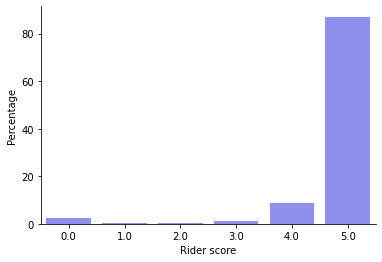

In [39]:
scores = taxi.rider_score.value_counts(normalize=True).mul(100).round(2) \
             .reset_index() \
             .rename(columns={'rider_score' : 'percentage',
                              'index' : 'rider_score'})
rider_score_counts = scores.sort_values('rider_score')
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()
plt.show()

* Водители ставят больше 0, чем клиенты
* **Водители ставят меньше 0, чем клиенты**
* Более 20% оценок составляют 4
* **Более чем в 80% случаев водители поставили клиентам 5 звездочек**